### Installation of packages

In [4]:
pip install tensorflow

  Using cached tensorflow-2.8.0-cp39-cp39-manylinux2010_x86_64.whl (497.6 MB)
  Using cached wrapt-1.14.0-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (77 kB)
  Using cached gast-0.5.3-py3-none-any.whl (19 kB)
  Using cached h5py-3.6.0-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (4.5 MB)
  Using cached numpy-1.22.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached libclang-13.0.0-py2.py3-none-manylinux1_x86_64.whl (14.5 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached tensorflow_io_gcs_filesystem-0.24.0-cp39-cp39-manylinux_2_12_x

### Unzip the compressed folder consists of the train and test data of 7 classes

In [5]:
!unzip face_emotion.zip

unzip:  cannot find or open face_emotion.zip, face_emotion.zip.zip or face_emotion.zip.ZIP.


### Importing Required Packages

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from PIL import Image
import glob

# Importing Deep Learning Libraries
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam

## Data Preparation

### Path of the directory is assigned to `face_dir`. Each image should be of size 48 * 48 

In [7]:
image_size = 48

face_dir = "face_emotion/"

### Assigning the path of `train` and `test` subfolders to `train_dir` and `test_dir`

In [8]:
train_dir = os.path.join(face_dir, "train")
test_dir = os.path.join(face_dir, "validation")

### Number of classes in train and validation datasets

In [9]:
print(f'No of classes : {len(os.listdir(train_dir))}')
print(f'No of Classes : {len(os.listdir(test_dir))}')   

FileNotFoundError: [Errno 2] No such file or directory: 'face_emotion/train'

### Count of images of each emotion in Training dataset

In [26]:
emo_list =[]
train_size = 0
expressions = glob.glob('face_emotion/train')
for expression in expressions:
    emo_list.extend([f for f in glob.glob(expression + "/*", recursive=True)])
for emotion in emo_list:
    train_size += int(len(os.listdir(emotion)))
    print(f'Image of {emotion} : {len(os.listdir(emotion))}')
print(train_size)
    

Image of face_emotion/train/angry : 3994
Image of face_emotion/train/disgust : 436
Image of face_emotion/train/fear : 4103
Image of face_emotion/train/happy : 7164
Image of face_emotion/train/neutral : 4982
Image of face_emotion/train/sad : 4938
Image of face_emotion/train/surprise : 3205
28822


### Count of images of each emotion in validation dataset


In [27]:
emo_test_list =[]
test_size = 0
expressions = glob.glob('face_emotion/validation')
for expression in expressions:
    emo_test_list.extend([f for f in glob.glob(expression + "/*", recursive=True)])
for emotion in emo_test_list:
    test_size += int(len(os.listdir(emotion)))
    print(f'Image of {emotion} : {len(os.listdir(emotion))}')
print(test_size)

Image of face_emotion/validation/angry : 960
Image of face_emotion/validation/disgust : 111
Image of face_emotion/validation/fear : 1018
Image of face_emotion/validation/happy : 1825
Image of face_emotion/validation/neutral : 1216
Image of face_emotion/validation/sad : 1139
Image of face_emotion/validation/surprise : 797
7066


### Plotting the images from the dataset Randomly

In [28]:
import random
def plot_images(source_path):
    images_list =[]
    expressions = glob.glob(source_path + '/*')
    for expression in expressions:
        images_list.extend([f for f in glob.glob(expression + "/*", recursive=True)])
    random.shuffle(images_list)
    plt.figure(figsize=(12, 12))
    for i in range(1,20):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        img = image.load_img(images_list[i], target_size=(image_size, image_size))
        plt.imshow(img)
    plt.show()

### calling the plot_images function by passing `train_dir` as path

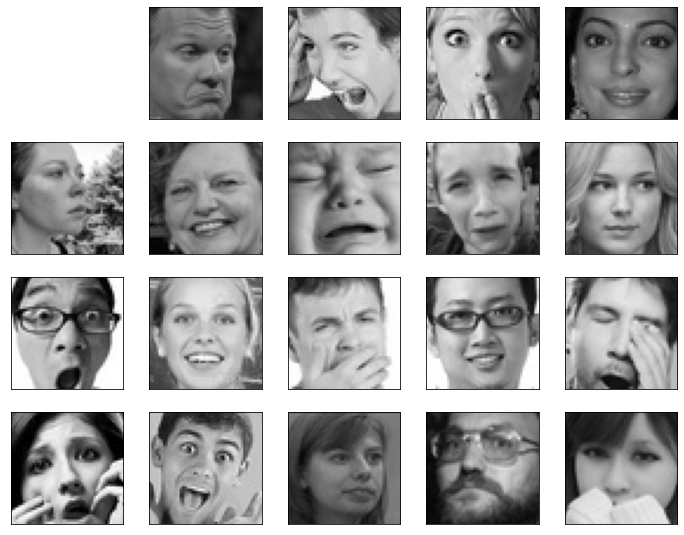

In [29]:
plot_images(train_dir)


### calling the plot_images function by passing `test_dir` as path

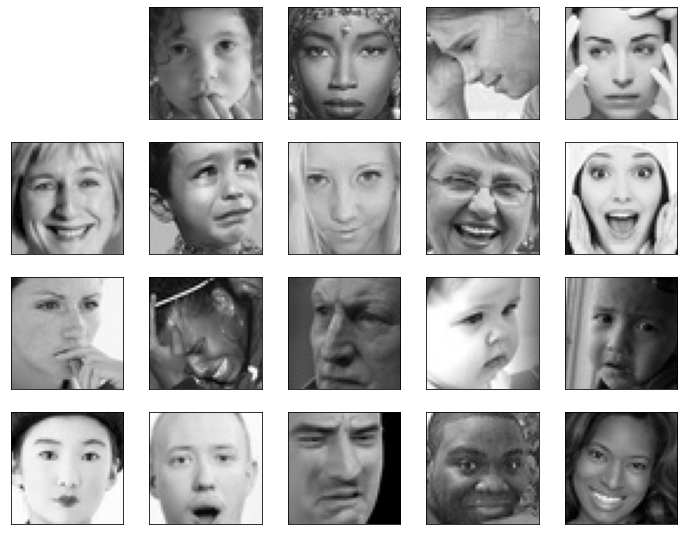

In [30]:
plot_images(test_dir)

### Function for displaying the emotion according to the expression passing as argument

In [33]:
def plot_image_acc_emotion(face_exp):
    plt.figure(figsize= (12,12))
    for i in range(1, 10, 1):
        plt.subplot(3,3,i)
        img = load_img(face_dir+"/train/"+face_exp+"/"+
                      os.listdir(face_dir + "/train/" + face_exp)[i], target_size=(image_size, image_size))
        plt.imshow(img)   
    plt.show()

### PLot the images based on the emotion 'happy' which is of highest number 

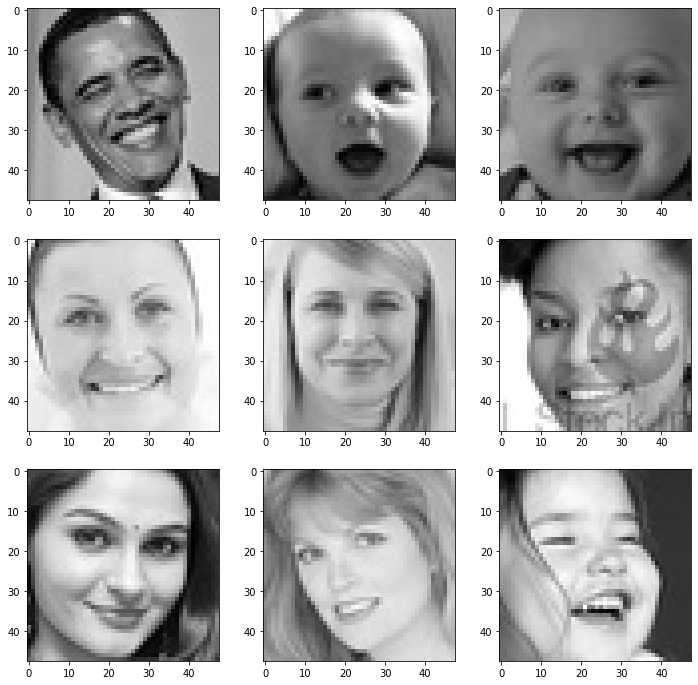

In [35]:
plot_image_acc_emotion('happy')

### PLot the images based on the emotion 'fear'

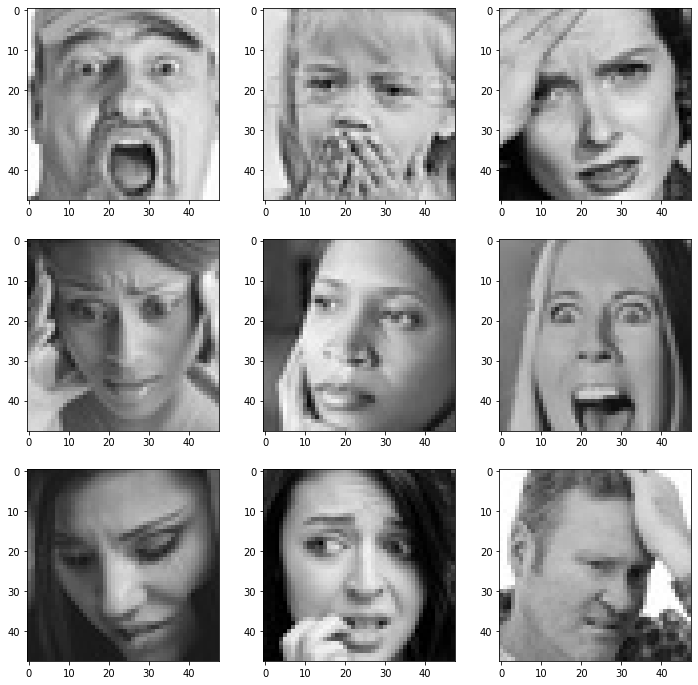

In [37]:
plot_image_acc_emotion('fear')

## Data Augmentation

### Total Images of different emotions varies, So, to balance the data, imagedatagenerator is used through which, new images will be generated according to the parameters. In training set , I split as 80:20; training:validation for testing purpose.

In [3]:
train_image_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2
)

test_image_datagen = ImageDataGenerator(rescale=1./255)

NameError: name 'ImageDataGenerator' is not defined

### `flow_from_directory` used to read the images from the train directory path mentioned as parameter abd create two subdirectories 'training', 'validation' and stores into two different variables.

In [ ]:
train_image_generator = train_image_datagen.flow_from_directory(train_dir,
        target_size=(image_size, image_size),
        batch_size=128,
        class_mode='categorical',
        color_mode = "grayscale",
        subset = 'training',                                                    
        shuffle = True)

valid_image_generator = train_image_datagen.flow_from_directory(train_dir,
        target_size=(image_size, image_size),
        batch_size=128,
        class_mode='categorical',
        color_mode = "grayscale",
        subset = 'validation' ,                                                       
        shuffle = False)
